<h1> Education in India
## District and state-wise primary & secondary school education data, 2015-16

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('2015_16_Statewise_Elementary.csv')
data.head()

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,...,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,JAMMU & KASHMIR,22,201,7263,1628,12549,20.05,16.01,...,1014,20491,1946,41171,62474,7878,564,495,24326,2001
1,2015-16,2,HIMACHAL PRADESH,12,124,10120,2243,6857,8.69,11.14,...,652,36054,3053,38307,6930,6909,6498,5445,6151,2717
2,2015-16,3,PUNJAB,22,146,13197,1780,27704,29.82,10.62,...,2754,88618,14200,56222,23531,42532,9244,8406,30835,7218
3,2015-16,4,CHANDIGARH,1,20,84,20,1055,97.25,11.18,...,117,1994,218,135,419,2066,0,36,1398,0
4,2015-16,5,UTTARAKHAND,13,95,11989,995,10117,21.54,13.14,...,1147,12608,1024,48215,14587,7545,12388,6671,1855,3227


### Filter out only the necessary columns for our analysis

In [36]:
col = ['STATNAME', 'DISTRICTS', 'TOTPOPULAT','SCHTOT','SCHTOTG','SCHTOTGR','SCHTOTPR','ENRTOT','ENRTOTG','ENRTOTGR', 
       'ENRTOTPR', 'TCHTOTG', 'TCHTOTP', 'SCLSTOT', 'STCHTOT', 'ROADTOT', 'SPLAYTOT', 'SWATTOT',  'SELETOT',] 

df = pd.DataFrame(data, columns=col)

In [58]:
df.head()

,STATNAME,DISTRICTS,TOTPOPULAT,SCHTOT,SCHTOTG,SCHTOTGR,SCHTOTPR,ENRTOT,ENRTOTG,ENRTOTGR,ENRTOTPR,TCHTOTG,TCHTOTP,SCLSTOT,STCHTOT,ROADTOT,SPLAYTOT,SWATTOT,SELETOT
0,JAMMU & KASHMIR,22.0,12549.0,28578.0,23329.0,21829.0,3776.0,1856776.0,1024643.0,951439.0,515189.0,98689.0,59148.0,2114.0,1745.0,22634.0,10604.0,26362.0,8078.0
1,HIMACHAL PRADESH,12.0,6857.0,18024.0,15386.0,15014.0,2258.0,950766.0,580395.0,547430.0,277699.0,66338.0,28524.0,540.0,1476.0,14929.0,15456.0,17999.0,16401.0
2,PUNJAB,22.0,27704.0,28776.0,20488.0,18005.0,3831.0,3962439.0,2072324.0,1560105.0,755203.0,128034.0,106425.0,562.0,1583.0,28650.0,27853.0,28771.0,28757.0
3,CHANDIGARH,1.0,1055.0,201.0,115.0,16.0,1.0,157921.0,101884.0,17869.0,386.0,5437.0,3801.0,1.0,0.0,201.0,187.0,201.0,201.0
4,UTTARAKHAND,13.0,10117.0,23660.0,17505.0,16860.0,4253.0,1712673.0,757209.0,679723.0,604115.0,65399.0,42144.0,259.0,1558.0,18214.0,13768.0,22836.0,16514.0


 ### Insights into the columns
 
       'SCHTOT', => total schools
       'SCHTOTG', => total govt schools
       'SCHTOTGR', => total govt schools - rural
       'SCHTOTPR', => total private schools - rural
       'ENRTOT',  => elementary enrollment in schools
       'ENRTOTG', => elementary enrollment in schools - govt
       'ENRTOTGR', => elementary enrollment in schools - govt, rural
       'ENRTOTPR', => elementary enrollment in schools - private, rural
       'TCHTOTG', => teachers in schools - govt
       'TCHTOTP', => teachers in schools - private
       'SCLSTOT', => single classroom schools
       'STCHTOT', => single teacher schools
       'ROADTOT', => Schools Approachable by All Weather Road
       'SPLAYTOT', => Schools with Playground Facility
       'SWATTOT',  => Schools with Drinking Water
       'SELETOT',  => Schools with Electricity

In [62]:
##correct the wrong value(population of west bengal)
df.loc[18,'TOTPOPULAT'] = df.loc[18,'TOTPOPULAT']/10

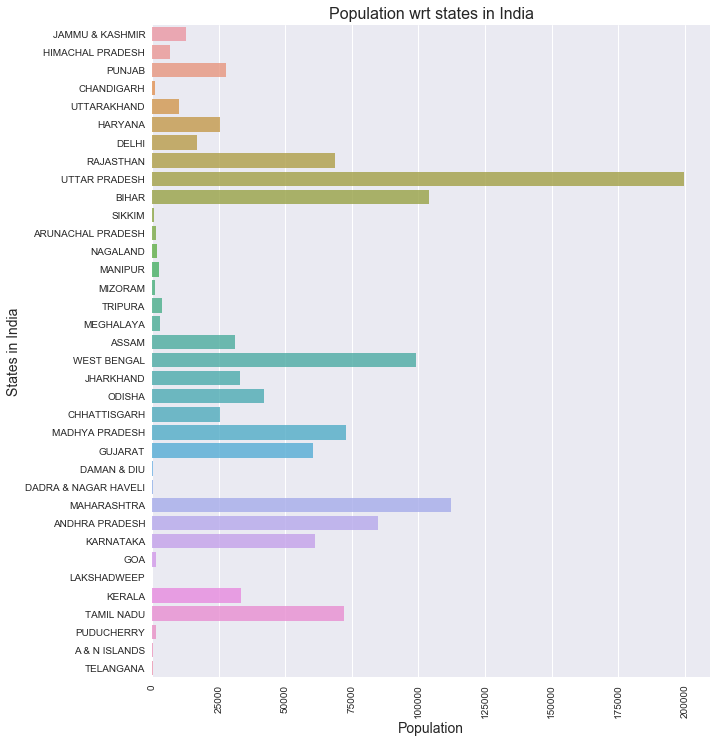

In [73]:
plt.figure(figsize=(10,12))
sns.barplot( df['TOTPOPULAT'],df['STATNAME'], alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Population', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Population wrt states in India", fontsize=16)
plt.show()

## The plot provides an overview as to where we can focus our resources, One can invest more in uttar pradesh as the population clearly is an advantage

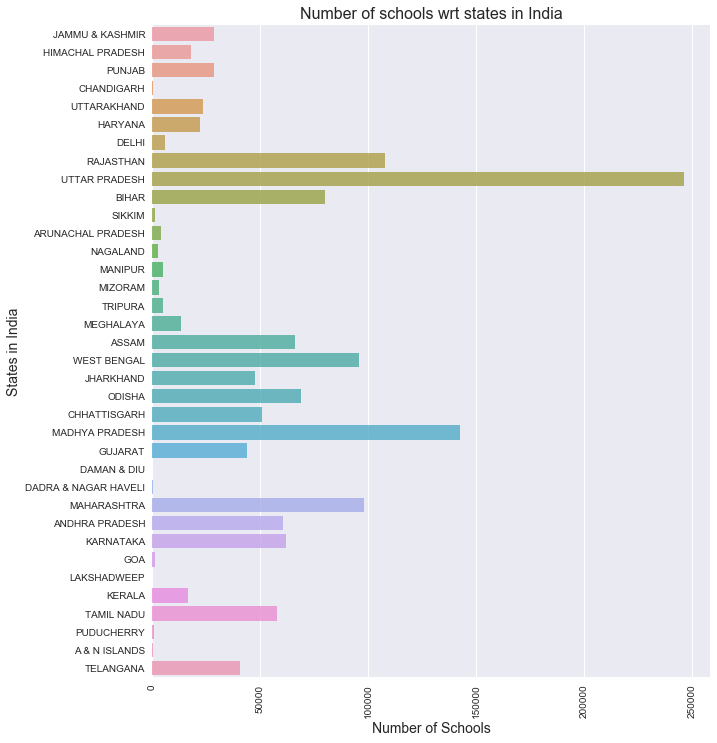

In [80]:
plt.figure(figsize=(10,12))
sns.barplot(df['SCHTOT'], df['STATNAME'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Number of Schools', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Number of schools wrt states in India", fontsize=16)
plt.show()

## We see a relation i.e population increases the number of schools also increases

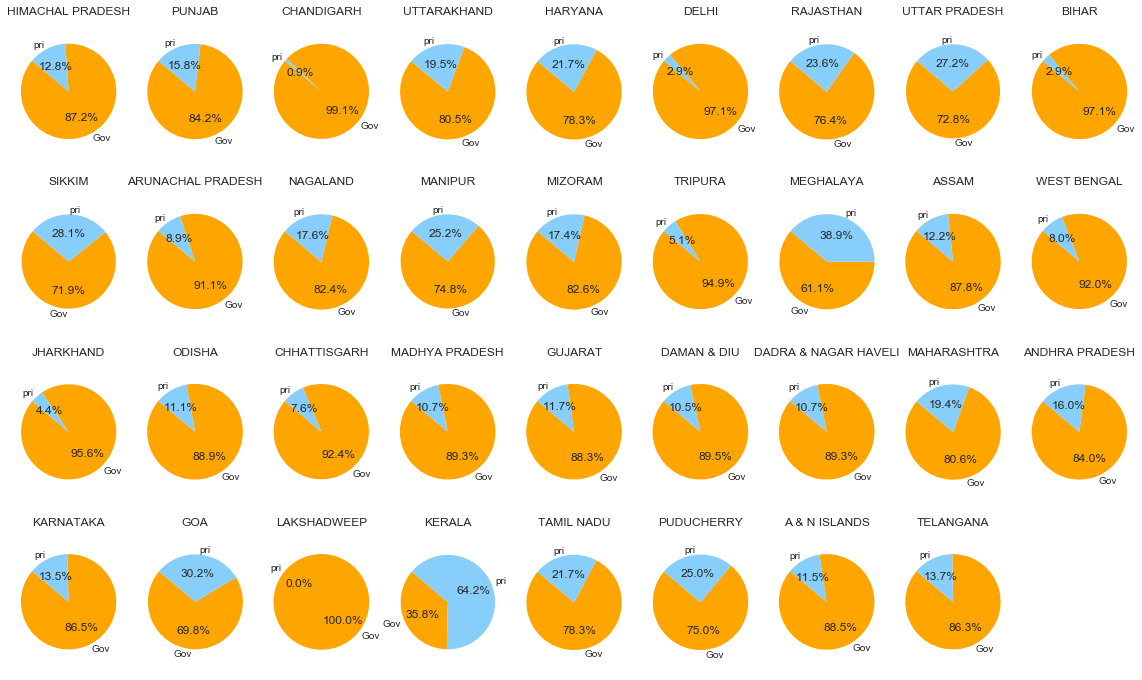

In [178]:
plt.figure(figsize=(20,12))
for i in range(1,len(data)):
    plt.subplot(4,9,i)
    plt.title(df['STATNAME'][i])
    top = ['Gov','pri']
    uttar = data.loc[df['STATNAME'] == df['STATNAME'][i],:]
    value =[float(uttar['SCHTOTG']/uttar['SCHTOT'])*100,float(uttar['SCHTOTPR']/uttar['SCHTOT'])*100]
    plt.pie(value, labels=top, colors=colors, autopct='%1.1f%%',startangle=140)
    plt.axis('equal')
plt.show()

## Ratio of government vs private schools with respect to every state in India
### 1) The number of governments schools is high in almost all states of India (except kerala)
### 2) 60% of the schools in kerala is private schools, which is unlike any other state ( it is an anamoly)
### 3) Incidentally kerala also has the highest literacy rate among the Indian states
### 4) In Bihar, which has one of the lowest literacy rates only 3% of the schools are private
## Does this mean that a states literacy depends on the number of private educations institutions, We can safely assume that there is a relation (as little as it may seem)

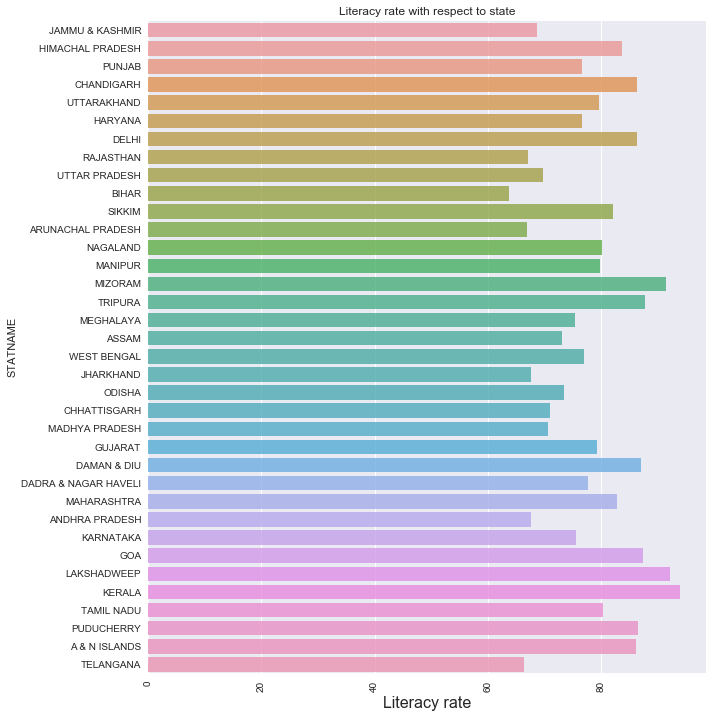

In [185]:
plt.figure(figsize=(10,12))
sns.barplot(data['OVERALL_LI'], data['STATNAME'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Literacy rate", fontsize=16)
plt.title('Literacy rate with respect to state')
plt.show()

## We can see almost all in India states have more than 50% literacy rate 

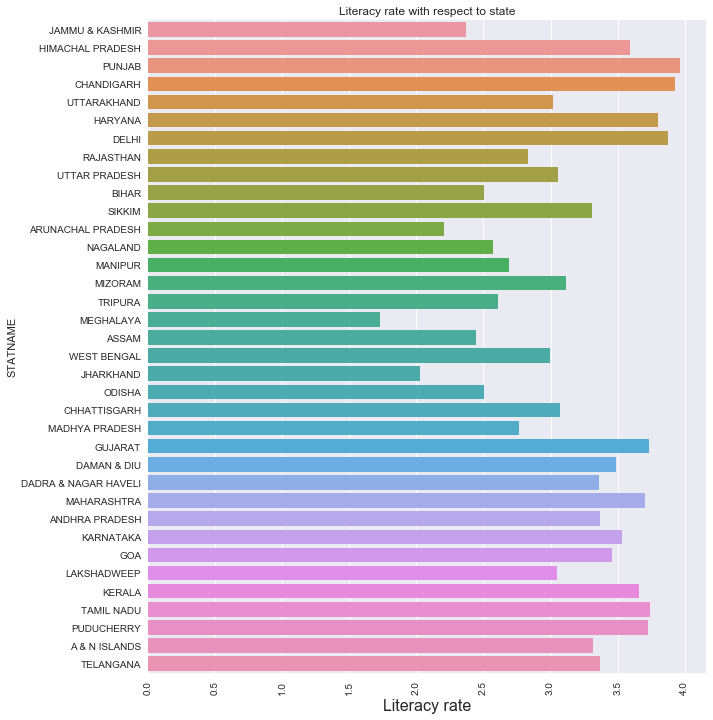

In [191]:
data['good'] = data['ROADTOT'] +data['SPLAYTOT'] + data['SWATTOT'] +data['SELETOT']
data['goodpercent'] = data['good']/data['SCHTOT']
plt.figure(figsize=(10,12))
sns.barplot(data['goodpercent'], data['STATNAME'],alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel("Literacy rate", fontsize=16)
plt.title('Literacy rate with respect to state')
plt.show()


## Percentage of schools with Playground Facility and Drinking Water and Electricity and also approachable by All Weather Roads in almost all states in India is < 4% which is pretty low
## The percentage of higly equipped schools are highest in the state of punjab and lowest in the state of meghalaya